In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
df = pd.read_csv("D:/4th year/Machine Learning/Practice/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<AxesSubplot:xlabel='Attrition', ylabel='count'>

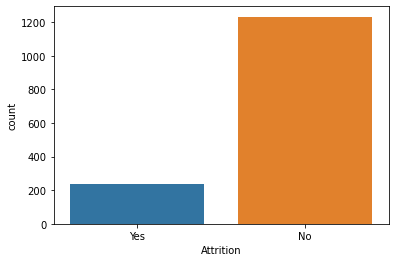

In [169]:
sns.countplot(x='Attrition', data=df)

In [170]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [171]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df['EducationField'] = le.fit_transform(df['EducationField'])
df['Gender'] = le.fit_transform(df['Gender'])
df['JobRole'] = le.fit_transform(df['JobRole'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['OverTime'] = le.fit_transform(df['OverTime'])
df['Department'] = le.fit_transform(df['Department'])
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [172]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [173]:
x = df.drop('Attrition', axis=1)
y = df.Attrition

Splitting

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [175]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(random_state=42)
clf1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [176]:
y_train_pred = clf1.predict(X_train)
y_test_pred = clf1.predict(X_test)

In [177]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Predictions on the test set
y_test_pred1 = clf1.predict(X_test)

# Classification Report and Confusion Matrix
print("Classification Report on Test Set:\n", classification_report(y_test, y_test_pred1))
print("Confusion Matrix on Test Set:\n", confusion_matrix(y_test, y_test_pred1))
print(f"Accuracy Score: {accuracy_score(y_test, y_test_pred1) * 100:.2f}%")


Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       380
           1       0.26      0.33      0.29        61

    accuracy                           0.78       441
   macro avg       0.57      0.59      0.58       441
weighted avg       0.80      0.78      0.79       441

Confusion Matrix on Test Set:
 [[323  57]
 [ 41  20]]
Accuracy Score: 77.78%


In [178]:
# One-hot encode categorical variables
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Instantiate the DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=42)

# Train the model
clf_dt.fit(X_train_encoded, y_train)


DecisionTreeClassifier(random_state=42)

In [179]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Predictions on the test set
y_test_pred = clf_dt.predict(X_test_encoded)

# Classification Report and Confusion Matrix
print("Classification Report on Test Set:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix on Test Set:\n", confusion_matrix(y_test, y_test_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_test_pred) * 100:.2f}%")


Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       380
           1       0.26      0.33      0.29        61

    accuracy                           0.78       441
   macro avg       0.57      0.59      0.58       441
weighted avg       0.80      0.78      0.79       441

Confusion Matrix on Test Set:
 [[323  57]
 [ 41  20]]
Accuracy Score: 77.78%


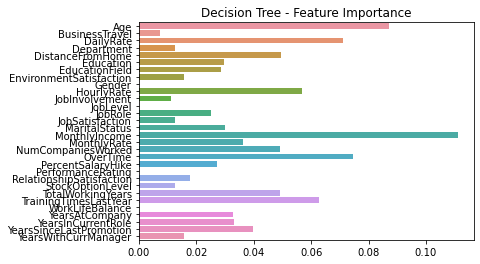

In [185]:
# Feature Importance
a_dt = clf1.feature_importances_
features_dt = X_train.columns
sns.barplot(x=a_dt, y=features_dt)
plt.title("Decision Tree - Feature Importance")
plt.show()


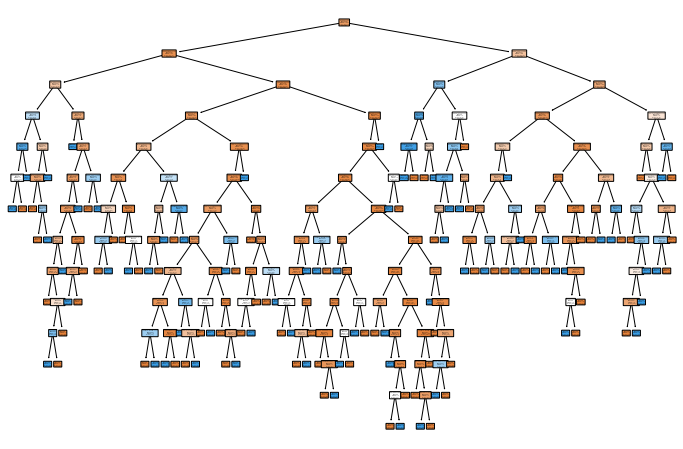

In [194]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(clf1, feature_names=list(x.columns), class_names=["No", "Yes"], filled=True, rounded=True)
plt.show()